# using pandas

In [1]:
#import pandas
import pandas as pd

In [3]:
#read the csv directly from the url and then save the results 
data=pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

#display the first 5 rows
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
#display the last 5 rows
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [5]:
data.shape #check the shape of the given data

(200, 4)

# using seaborn library to visualize the data

In [6]:
#importing the seaborn library
import seaborn as sns

#making the plots able to be diplayed in the notebook
%matplotlib inline


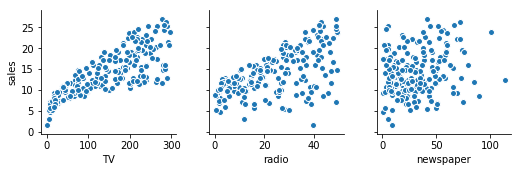

In [9]:
#visualizing the relationship between the features and the response using the feature plots
sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars=['sales'])

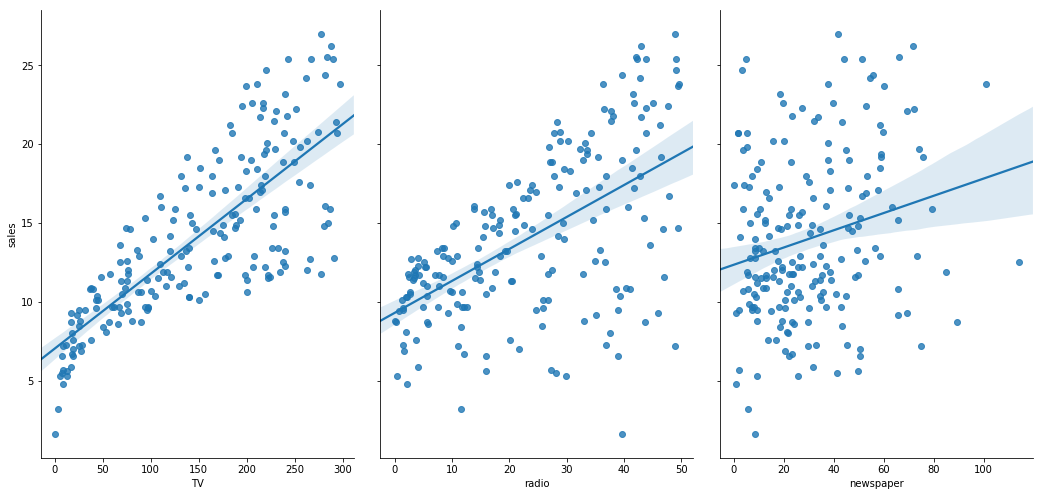

In [12]:
#visualizing the relationship between the features and the response using the feature plots
sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars=['sales'],size=7,aspect=0.7,kind='reg')

# preparing X and y using pandas

In [13]:
#create a python list of the feature names
feature_cols=['TV','radio','newspaper']

#use the list to select a subset of the original data frame
X=data[feature_cols]

#print the first 5 rows
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [14]:
#check the type and shape of x
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [16]:
y=data['sales'] #select a series from the data frame

#equivalent command if there are no space in the column name  y=data.sales

#print the first 5 rows

y.head()



1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [17]:
#check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


# splitting the training and testing sets from x and y

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1) #by default takes 25% for testing


In [19]:
#printing the shapes of xtrain,ytrain,xtest,ytest
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)


X_train: (150, 3)
X_test: (50, 3)
y_train: (150,)
y_test: (50,)


# Linear regression using the sklearn

In [20]:
#import the model
from sklearn.linear_model import LinearRegression

#instantiate
linreg=LinearRegression()

#fit the model into the training data(learn the coefficients)
linreg.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# interpreting the model coefficients

In [21]:
#print the intercept and the coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.87696662231793
[0.04656457 0.17915812 0.00345046]


In [22]:
#pair the feature names with the coefficients

list(zip(feature_cols,linreg.coef_))

[('TV', 0.04656456787415028),
 ('radio', 0.1791581224508884),
 ('newspaper', 0.0034504647111804343)]

In [23]:
#make predictions on the testing set
y_pred=linreg.predict(X_test)

In [24]:
#checking the mean absolute error

from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))

1.0668917082595213


In [25]:
#checking the mean square error
print(metrics.mean_squared_error(y_test,y_pred))

1.9730456202283377


In [26]:
#checking the mean square root error
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.4046514230328953


You can add and remove various features and then check the errors and accuracy etc to see if they are impotant and if they improve our estimations